# Busqueda uniforme

### Función de prueba

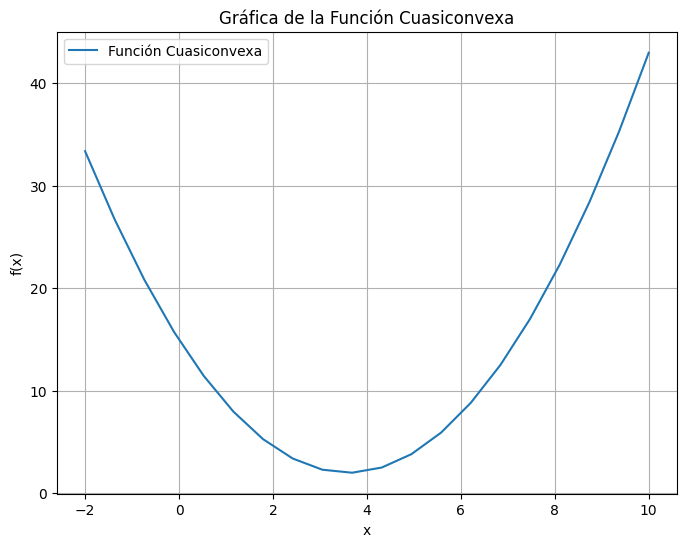

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def quasiconvex_function(x):
  return ((x-3.6)**2) +2

#Graficar función
# Generar valores de x
x_values = np.linspace(-2, 10, 20)

# Calcular los valores correspondientes de y utilizando la función quasiconvex_function
y_values = [quasiconvex_function(x) for x in x_values]

# Graficar la función
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Función Cuasiconvexa')
plt.title('Gráfica de la Función Cuasiconvexa')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()

### 1. División del intervalo

In [2]:
#Selección de intervalo a evaluar [a, b]
a = -2
b = 10

#Tamaño de la malla
d = 1

#Numero de evaluaciones
#Esta formula no tiene en cuenta las evaluaciones de los limites si se tuvieran en cuenta se deberian sumar 2 valores
n = ((b-a)/d)-1
print(f"Evaluaciones: {n}")
print(f"Evaluaciones + limites [a,b]: {n+2}")


Evaluaciones: 11.0
Evaluaciones + limites [a,b]: 13.0


### 2. Evaluación en los puntos de malla


In [3]:
data = {}
if "x" not in data:
    data["x"] = []
    data["fx"] = []

for i in range (a,b+1,d):
  # Va a evaluar en a, n valores, y finalmente en b para un total de n+2 valores
  #----------------#
  #Guado los datos en un diccionario donde la key es x (i) y el value es fx (quasi(i))
  
  data["x"].append(i)
  data["fx"].append(quasiconvex_function(i))
  print(f"X: {i}, F(X): {quasiconvex_function(i)}")

X: -2, F(X): 33.36
X: -1, F(X): 23.159999999999997
X: 0, F(X): 14.96
X: 1, F(X): 8.760000000000002
X: 2, F(X): 4.5600000000000005
X: 3, F(X): 2.3600000000000003
X: 4, F(X): 2.16
X: 5, F(X): 3.96
X: 6, F(X): 7.76
X: 7, F(X): 13.559999999999999
X: 8, F(X): 21.360000000000003
X: 9, F(X): 31.160000000000004
X: 10, F(X): 42.96000000000001


### 3. Encontrar el minimo

In [4]:
#Encontrar la evaluación mínima
min_fx = min(data["fx"])
#Encontrar el valor de x correspondiente a la evaluación mínima
min_x = data["x"][data["fx"].index(min_fx)]

print(f"min x: {min_x}")   
print(f"min fx: {min_fx}")

min x: 4
min fx: 2.16


### 4. Reduce incertidumbre

In [5]:
#El minimo de la función se encuentra entre
print(f"El minimo de la función se encuentra entre [{min_x - d}, {min_x + d}]")

El minimo de la función se encuentra entre [3, 5]


### Grafica final

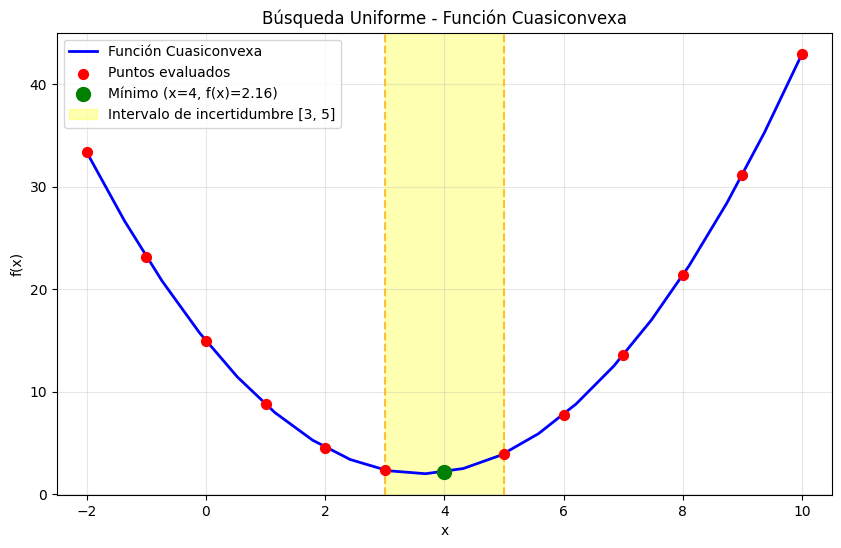

In [6]:
# Crear la gráfica con el intervalo señalado
plt.figure(figsize=(10, 6))

# Graficar la función original
plt.plot(x_values, y_values, 'b-', label='Función Cuasiconvexa', linewidth=2)

# Graficar los puntos evaluados
plt.scatter(data["x"], data["fx"], color='red', s=50, label='Puntos evaluados', zorder=5)

# Marcar el punto mínimo
plt.scatter(min_x, min_fx, color='green', s=100, label=f'Mínimo (x={min_x}, f(x)={min_fx:.2f})', zorder=6)

# Sombrear el intervalo de incertidumbre
interval_start = min_x - d
interval_end = min_x + d
plt.axvspan(interval_start, interval_end, alpha=0.3, color='yellow', label=f'Intervalo de incertidumbre [{interval_start}, {interval_end}]')

# Líneas verticales para marcar el intervalo
plt.axvline(x=interval_start, color='orange', linestyle='--', alpha=0.7)
plt.axvline(x=interval_end, color='orange', linestyle='--', alpha=0.7)

plt.title('Búsqueda Uniforme - Función Cuasiconvexa')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(a-0.5, b+0.5)
plt.show()